# Zestimating SoCal Single Family Parcels
                                    Nicholas Dougherty
                                    March 30th, 2022
## Executive Summary

The goal has been to extrapolate a home's assessed value based on publicly available tax records contained in Zillow's data dated in 2017, preprocessing and parsing among single family residences in order to create supervised Machine Learning models. 

### Project Overview

- The DS pipeline's first-half--__acquisition, preparation, exploration__--were automated via Python scripts.
- Data cleaned by replacing null values, dropping duplicates, one-hot encoding categoricals and removing outliers.
- Data split into train, validate, and test before exploration to maintain informational integrity.
- Statistical analyses tested the following hypotheses:
    - Tax value of homes in Los Angeles exceed the mean tax value
    - Is there a linear correlation between number of half-baths and tax value (pearson's correlation test)
- Recursive feature engineering faciliated the inclusions of features for the models 
- Since our target variable, tax value, is continuous, the following algorithms were implemented:
    - OLS Regression
    - 
    - 
    -
- The best model was fit upon the test set. 

### Key Takeaways

- The ______ were found to be the best drivers of tax value
- Some variables like ______ were highly correlated with each other 
- The property's build year did not seem to have a significant impact on the tax value of the properties
- There were some outliers in the data in square footage and number of bedrooms and bathrooms 
    - These were handled by using a Robust Scaler to reduce the effect of outliers on the model's performance
- The baseline mean's RMSE of _____ 
    - ______ models beat this RMSE 
- The Root Mean Squared Error (RMSE) and R squared were utilized as metrics to evaluate a model's performance
    - My best model's RMSE was ______ and R squared was _______ %.
    - This improved to an RMSE of _____ and R squared of _____ on the test split

### Import(ant) Modules

In [2]:
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns

# custom module imports
from acquire import acquire_zillow_data
from prepare import remove_outliers, prepare_zillow
from wrangle import wrangle_zillow

# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# import scaling methods
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from scipy import stats

# import modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

import lux

## Acquisition

This set was acquired from Codeup's database using a SQL query that selects and renames features from properties_2017 and joins to predictions and propertylandusetype (by using parcelid and propertylandusetypeid, respectively) to retrieve single family residential units. For clarity's sake a single unit property is defined as [revise] a housing unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence, such as a house, apartment, or mobile home, and may also be a single unit in a group of rooms.

Some columns were renamed during acquisition to make variable names more descriptive.

In [3]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_zillow('tax_value')

Using cached CSV
Undergoing preparatory stage: 

199 null values removed. 
 52,319 rows remain.
 
Yearbuilt converted to age. 

 Federal Information Processing Standard Publication (FIPS) 
 reveals this Zillow data deals with three counties: 
 Los Angeles (06037), Orange (06059), and Ventura (06111). 
 Hence, data pertains only to Southern California. 

Outliers removed individually on a county-by-county basis. 
 County data recombined accordingly. 
 DF row-based percentage loss after outlier eradication: 19.13%. 

(23693, 7) (10155, 7) (8462, 7)


In [11]:
X_train
X_validate
y_train
y_validate
X_train.shape
y_train.shape
# Cool 

(23693,)

In [79]:
def tax_correlations(train):
    '''
    Receives the zillow train sample, then uses pandas creates a
    heatmap of the correlations among quantitative features and target. 
    '''
    # establish figure size
    #sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30, 15))
    
    plt.figure(figsize=(6,6))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlation Before Considering Scalers')
    # display the plot
    plt.show()
    
    # visualize predictors' correlation with the target variable 
    plt.figure(figsize=(6,6))
    plt.ylabel('Correlation')
    plt.title('Correlation of features with target of tax_value')
    train.corr().tax_value.sort_values(ascending=False).plot(kind='bar', figsize=(6,6))
    
        # establish figure size
    plt.figure(figsize=(6,6))
    heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value')
    # display the plot
    plt.show()
    plt.tight_layout()

In [15]:
def tax_correlations(train):
    '''
    Receives the zillow train sample, then uses pandas creates a
    heatmap of the correlations among quantitative features and target.
    Will be used to check correlations before scaling to determine if scaling is desirable. 
    '''
    # establish figure size
    plt.figure(figsize=(6,6))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlation Before Considering Scalers')
    # display the plot
    plt.show()
    
    # visualize predictors' correlation with the target variable 
    plt.figure(figsize=(9,9))
    plt.ylabel('Correlation')
    plt.title('Correlation of features with target of tax_value')
    train.corr().tax_value.sort_values(ascending=False).plot(kind='bar', figsize=(9,9))
    
        # establish figure size
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value')
    # display the plot
    plt.show()

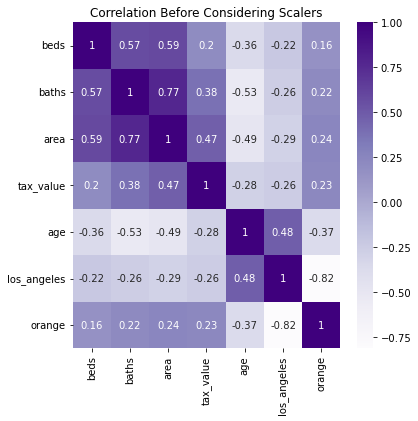

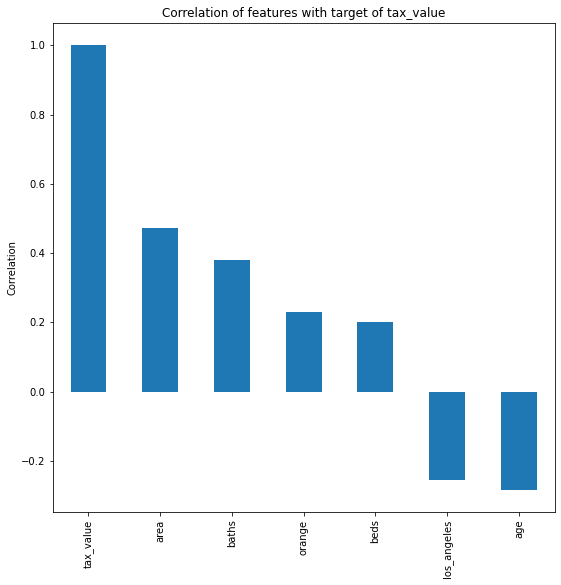

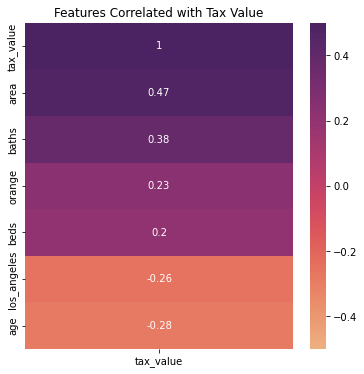

In [16]:
tax_correlations(train)

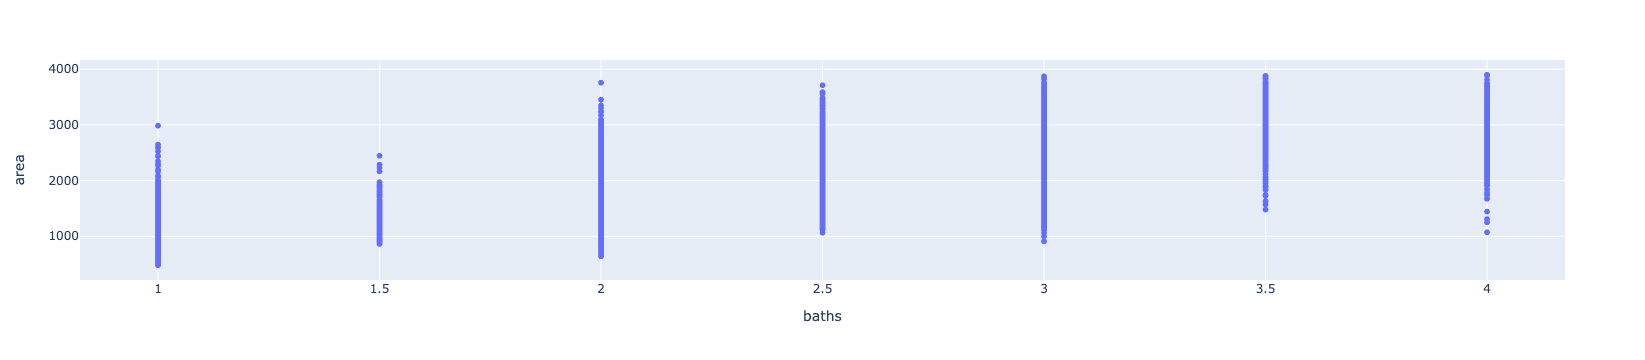

In [16]:
import plotly.express as px
fig = px.scatter(train, x="baths", y="area")
fig.show()

I ended up using this notebook as some weird preparation thing and just deleted most of the content after it was all wrapped up. Ultimately, the scatterbrained all over the movements would have confused anyone. My wrangle function is going to be ridiculous. 

In [12]:
train.dtypes

beds           float64
baths          float64
area           float64
tax_value      float64
county          object
age              int64
los_angeles      uint8
orange           uint8
dtype: object


In [21]:
def scale_data(X_train, X_validate, X_test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    
    Target is not scaled.
    
    columns_to_scale was originally used to check whether los_angeles and orange would cause trouble
    '''
    columns_to_scale = ['beds', 'baths', 'area', 'age', 'los_angeles', 'orange']
    
    X_train_scaled = X_train.copy()
    X_validate_scaled = X_validate.copy()
    X_test_scaled = X_test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(X_train_scaled[columns_to_scale])
    
    X_train_scaled[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
    X_validate_scaled[columns_to_scale] = scaler.transform(X_validate[columns_to_scale])
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
    
    if return_scaler:
        return scaler, X_train_scaled, X_validate_scaled, X_test_scaled
    else:
        return X_train_scaled, X_validate_scaled, X_test_scaled

In [22]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test)

In [23]:
X_train_scaled

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 1.0, 'Scaled')

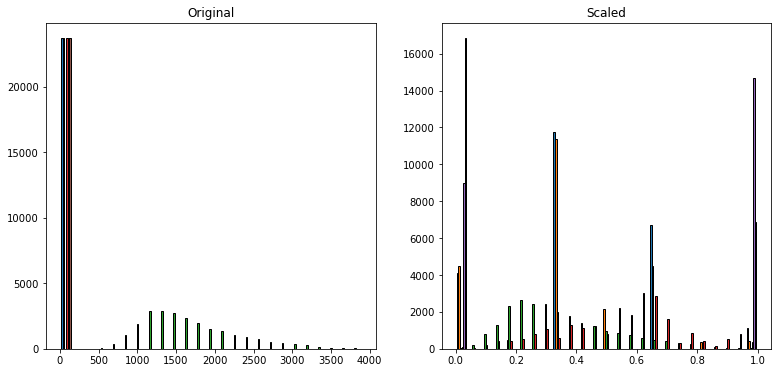

In [24]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

The scaler is evening (as in making even, not nocturnal) the playing field. Well, sort of. Of course the 0s and 1s are primarily ruled by the county dummies. We'll see how this plays out. I wanna check the correlations again. 

Unscaled


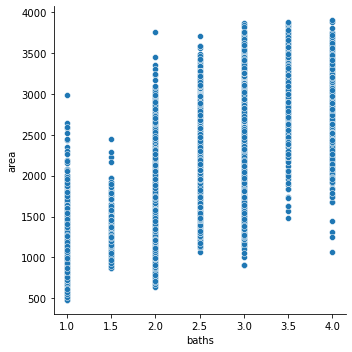

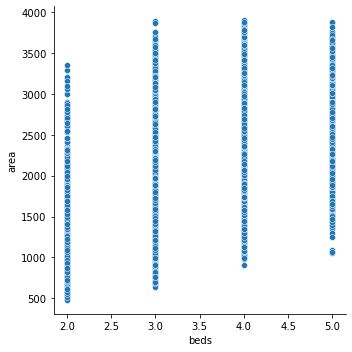

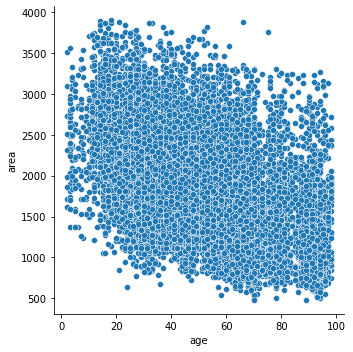

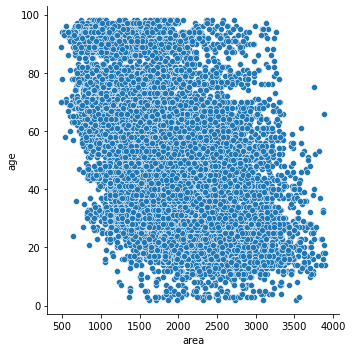

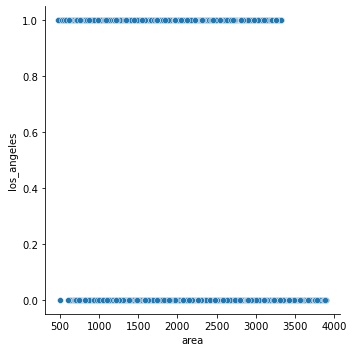

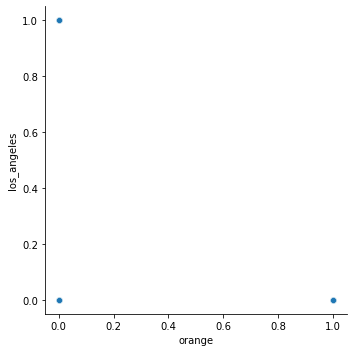

In [35]:
print('Unscaled')
sns.relplot(data = X_train, x = 'baths', y = 'area')
sns.relplot(data = X_train, x = 'beds', y = 'area')
sns.relplot(data = X_train, x = 'age', y = 'area')
sns.relplot(data = X_train, x = 'area', y = 'age')
sns.relplot(data = X_train, x = 'area', y = 'los_angeles')
sns.relplot(data = X_train, x = 'orange', y = 'los_angeles')


Scaled


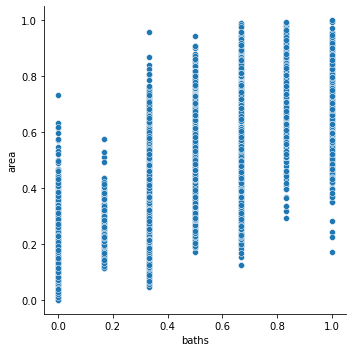

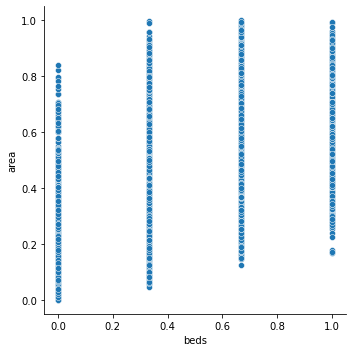

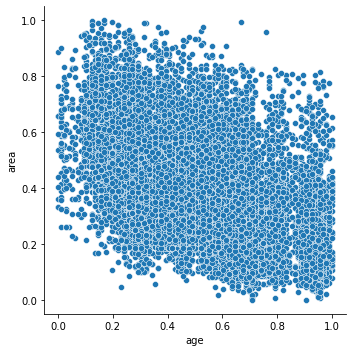

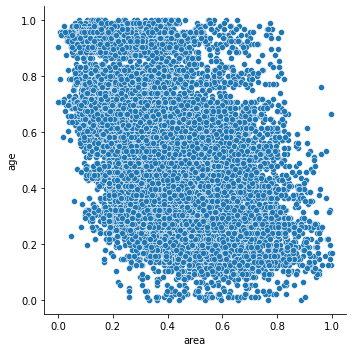

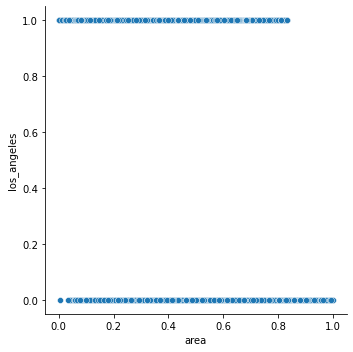

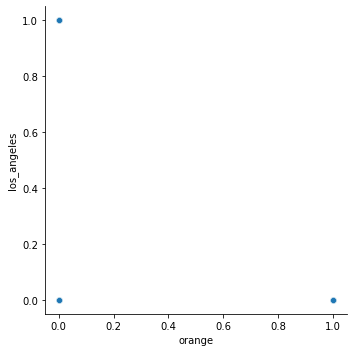

In [36]:
print('Scaled')
sns.relplot(data = X_train_scaled, x = 'baths', y = 'area')
sns.relplot(data = X_train_scaled, x = 'beds', y = 'area')
sns.relplot(data = X_train_scaled, x = 'age', y = 'area')
sns.relplot(data = X_train_scaled, x = 'area', y = 'age')
sns.relplot(data = X_train_scaled, x = 'area', y = 'los_angeles')
sns.relplot(data = X_train_scaled, x = 'orange', y = 'los_angeles')

In [34]:
train2 = train.copy()

In [37]:
X_train.los_angeles.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [38]:
X_train_scaled.los_angeles.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# as expected, scaling made no difference for county. There must be a way to fix distribution. 

In [42]:
scaler = MinMaxScaler()
train2[['baths_scaled', 'beds_scaled', 'area_scaled', 'age_scaled']] = scaler.fit_transform(train2[['baths', 'beds', 'area', 'age']])

In [ ]:
train2

In [48]:
def tax_correlations_after_scale(train, train2):
    '''
    Receives the zillow train sample, then uses pandas creates a
    heatmap of the correlations among quantitative features and target. 
    This happens for the scaled and unscaled train to compare values.
    '''
    # establish figure size
    plt.figure(figsize=(6,6))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlation Before Considering Scalers')
    # display the plot
    plt.show()
    
    # establish figure size
    plt.figure(figsize=(6,6))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train2.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlation After Considering Scalers')
    # display the plot
    plt.show()

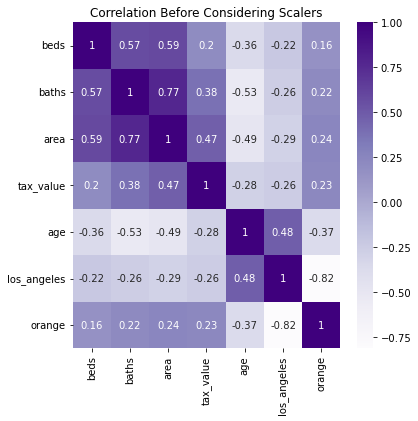

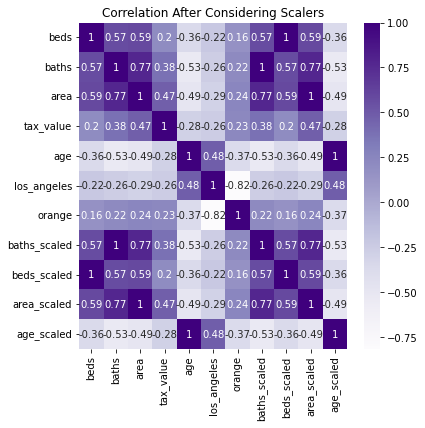

In [49]:
tax_correlations_after_scale(train, train2)
# disregard the before considering scalers statement. 

In [ ]:
# Take away: Jesus saves? That is a cross. It's really just the former zoomed out. Sigh. 
# Maybe removing the outliers was effectively a min max scaler. Interesting. 

In [50]:
def tax_correlations_redux(train, train2):
    '''
    easier to distinguish
    '''
    # establish figure size
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value Unscaled')
    # display the plot
    plt.show()
    
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train2.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value Unscaled')
    # display the plot
    plt.show()
    


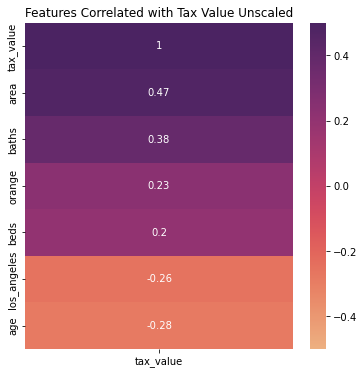

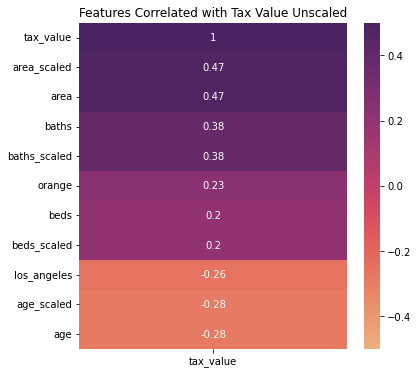

In [51]:
tax_correlations_redux(train, train2)

In [52]:
# sanity check. The scalers aren't making a difference. 
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [53]:
train2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [54]:
train3 = train2.copy()

In [57]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(output_distribution = 'normal')
train3[['baths_trantran', 'beds_trantran', 'area_trantran', 'age_trantran']] = quantile_trans.fit_transform(train[['baths', 'beds', 'area', 'age']])

In [61]:
def tax_correlations_bigger(train3):
    '''
    Receives the zillow train sample, then uses pandas creates a
    heatmap of the correlations among quantitative features and target. 
    Is also used for X_train_scaled. 
    '''
    # establish figure size
    plt.figure(figsize=(12,12))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train3.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlation Before Considering Scalers')
    # display the plot
    plt.show()
    
        # visualize predictors' correlation with the target variable 
    plt.figure(figsize=(9,9))
    plt.ylabel('Correlation')
    plt.title('Correlation of features with target of tax_value')
    train3.corr().tax_value.sort_values(ascending=False).plot(kind='bar', figsize=(9,9))
    
        # establish figure size
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train3.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value')
    # display the plot
    plt.show()

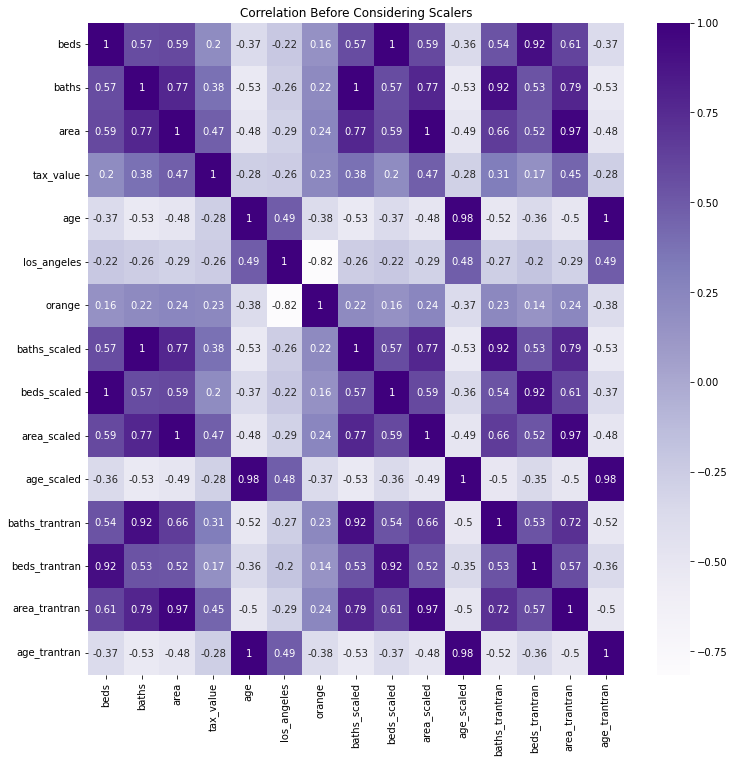

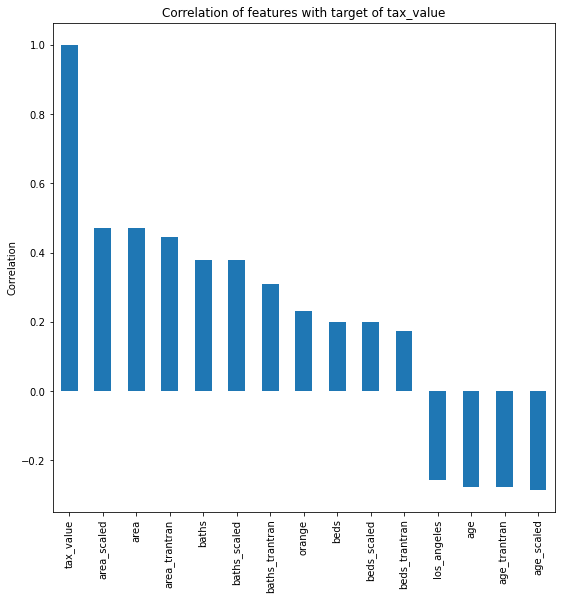

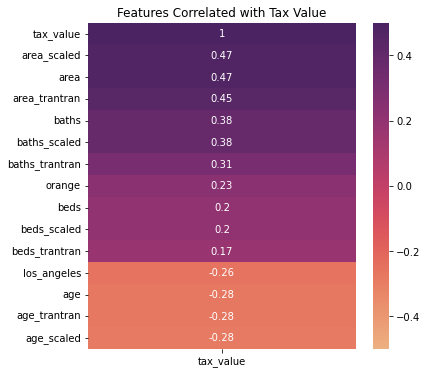

In [62]:
tax_correlations_bigger(train3)

In [ ]:
# This just did it again. trantran has less correlation. Early outlier removal may have ruined my model, or it may have improved it. 
# Too late to go back. 

In [65]:
quantile_trans2 = QuantileTransformer()
train[['baths_transformed2', 'beds_transformed2', 'area_transformed2', 'age_transformed2']] = quantile_trans2.fit_transform(train[['baths', 'beds', 'area', 'age']])

In [66]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

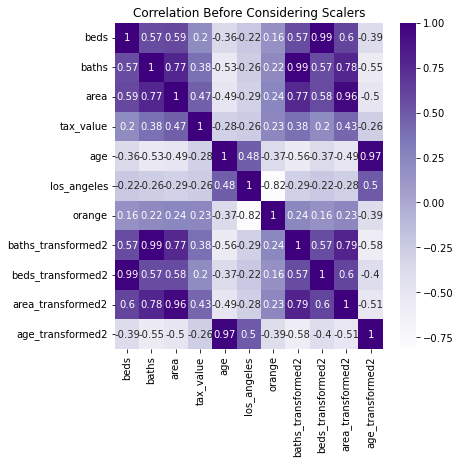

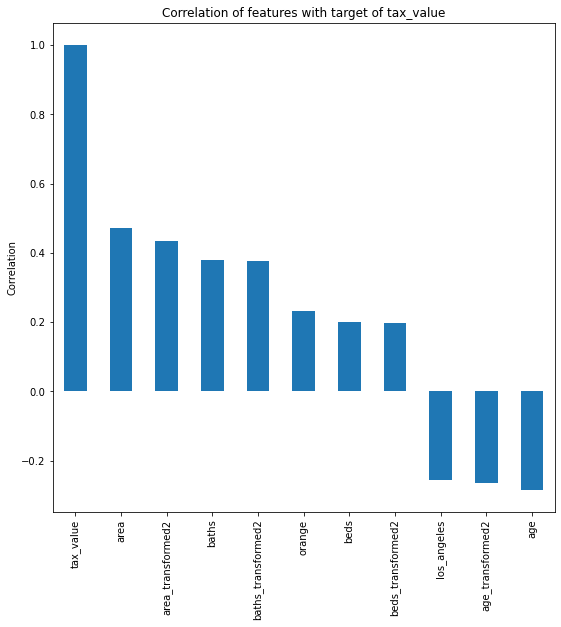

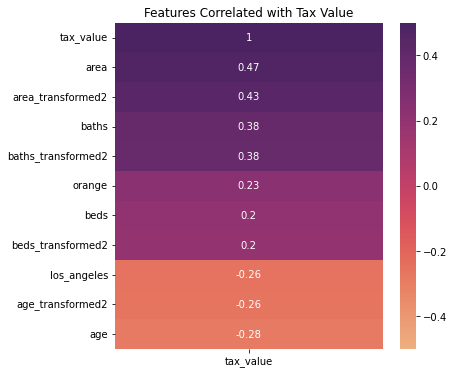

In [67]:
tax_correlations(train)
# ignore before considering scalers.

In [ ]:
# I might need to adjust the k in my outliers function. And then rerun these as a test. 

In [68]:
df = acquire_zillow_data()

Using cached CSV


In [73]:
def prepare_zillow_anew(df, target):
    '''

    '''
    print('Undergoing preparatory stage: \n')
    #just in case there are blanks
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    # drop all nulls, for an affect of .00586 on data
    df.dropna(axis=0, how='any', inplace=True)
    print('199 null values removed. \n 52,319 rows remain.\n ')
    
    df['year_built'] = df['year_built'].astype(int)
    df.year_built = df.year_built.astype(object) 
    df['age'] = 2017-df['year_built']
    df = df.drop(columns='year_built')
    df['age'] = df['age'].astype('int')
    print('Yearbuilt converted to age. \n')

     # modify two columns
    df['county'] = df.county.apply(lambda fips: '0' + str(int(fips)))
    df['county'].replace({'06037': 'los_angeles', '06059': 'orange', '06111': 'ventura'}, inplace=True)
    print(' Federal Information Processing Standard Publication (FIPS) \n reveals this Zillow data deals with three counties: \n Los Angeles (06037), Orange (06059), and Ventura (06111). \n Hence, data pertains only to Southern California. \n')

    
    orange = df[df['county'] == 'orange']
    ventura = df[df['county'] == 'ventura']
    los_angeles = df[df['county'] == 'los_angeles']
    orange = remove_outliers(orange, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    ventura = remove_outliers(ventura, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    los_angeles = remove_outliers(los_angeles, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    df2 = pd.concat([orange, ventura], axis=0)
    df = pd.concat([df2, los_angeles], axis=0)
    # this row was discovered as having area as 152 square feet. YET it has five bed and two columns. Get it out. 
    df = df.drop(labels=51075, axis=0)
    
    print('Outliers removed individually on a county-by-county basis. \n County data recombined accordingly. \n DF row-based percentage loss after outlier eradication: 19.13%. \n')
    
    dummy_df = pd.get_dummies(df['county'],
                                 drop_first=False)
       # add the dummies as new columns to the original dataframe
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=['ventura', 'county'])
    # may drop county later, might just opt to not use it. 
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    print(train.shape, validate.shape, test.shape)
    
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [74]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare_zillow_anew(df, 'tax_value')

Undergoing preparatory stage: 

199 null values removed. 
 52,319 rows remain.
 
Yearbuilt converted to age. 

 Federal Information Processing Standard Publication (FIPS) 
 reveals this Zillow data deals with three counties: 
 Los Angeles (06037), Orange (06059), and Ventura (06111). 
 Hence, data pertains only to Southern California. 

Outliers removed individually on a county-by-county basis. 
 County data recombined accordingly. 
 DF row-based percentage loss after outlier eradication: 19.13%. 

(27628, 7) (11841, 7) (9868, 7)


In [75]:
# (23693, 7) (10155, 7) (8462, 7) this was the shape when k was at 1.5
# now, the same process. 
X_train_scaled2, X_validate_scaled2, X_test_scaled2 = scale_data(X_train, X_validate, X_test)

Text(0.5, 1.0, 'Scaled')

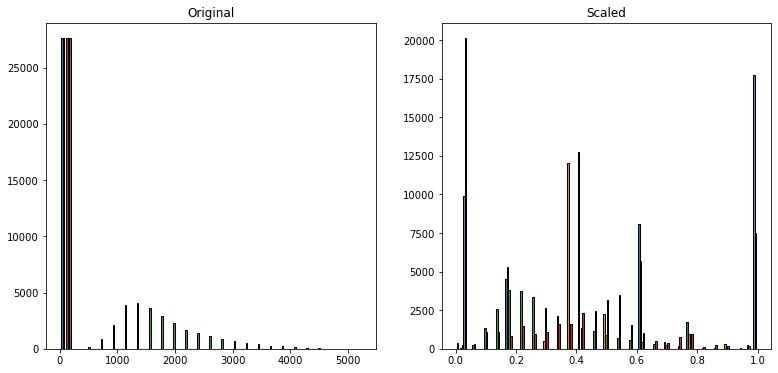

In [76]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled2, bins=25, ec='black')
plt.title('Scaled')

In [77]:
# Still looks the same after outliers were less removed. 
scaler = MinMaxScaler()
train[['baths_scaled', 'beds_scaled', 'area_scaled', 'age_scaled']] = scaler.fit_transform(train[['baths', 'beds', 'area', 'age']])

In [78]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

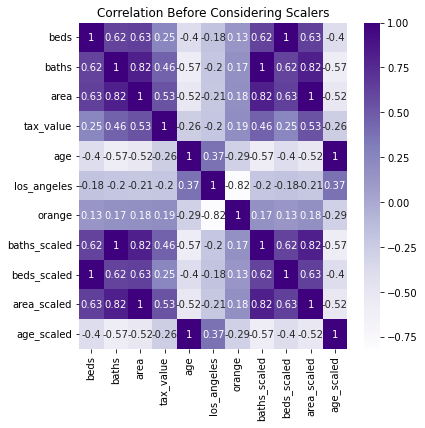

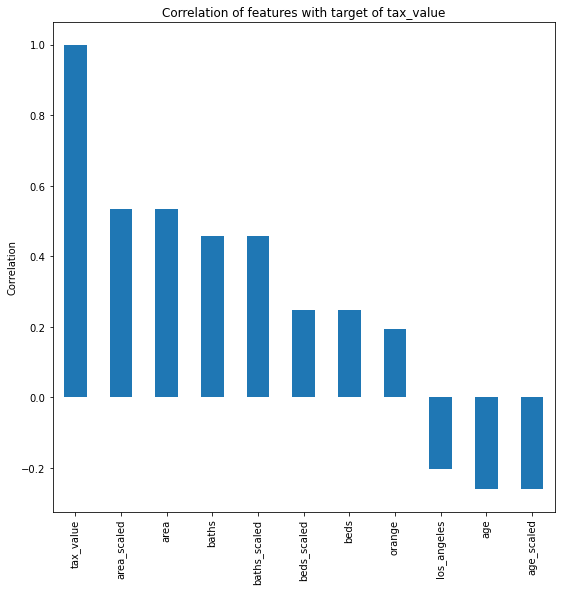

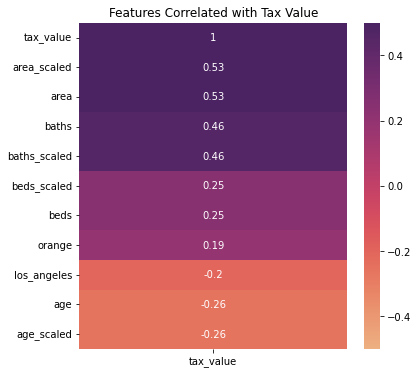

In [79]:
tax_correlations(train)

In [80]:
# the same case, where the min max has no influence on the data. 
train
# I was told not to scale the tax value. But this is having no impact. maybe outliers are worth ignoring. 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# In short. Scaling is a waste of time. UNLESS, not removing outliers from the onset improves the correlation. But would that even be acceptable?
# let's test. 

In [83]:
def prepare_zillow_anew2(df, target):
    '''

    '''
    print('Undergoing preparatory stage: \n')
    #just in case there are blanks
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    # drop all nulls, for an affect of .00586 on data
    df.dropna(axis=0, how='any', inplace=True)
    print('199 null values removed. \n 52,319 rows remain.\n ')
    
    df['year_built'] = df['year_built'].astype(int)
    df.year_built = df.year_built.astype(object) 
    df['age'] = 2017-df['year_built']
    df = df.drop(columns='year_built')
    df['age'] = df['age'].astype('int')
    print('Yearbuilt converted to age. \n')

     # modify two columns
    df['county'] = df.county.apply(lambda fips: '0' + str(int(fips)))
    df['county'].replace({'06037': 'los_angeles', '06059': 'orange', '06111': 'ventura'}, inplace=True)
    print(' Federal Information Processing Standard Publication (FIPS) \n reveals this Zillow data deals with three counties: \n Los Angeles (06037), Orange (06059), and Ventura (06111). \n Hence, data pertains only to Southern California. \n')

    
    # orange = df[df['county'] == 'orange']
    # ventura = df[df['county'] == 'ventura']
    # los_angeles = df[df['county'] == 'los_angeles']
    # orange = remove_outliers(orange, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    # ventura = remove_outliers(ventura, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    # los_angeles = remove_outliers(los_angeles, 2.5, ['beds', 'baths', 'area', 'tax_value', 'age'])
    #df2 = pd.concat([orange, ventura], axis=0)
    #df = pd.concat([df2, los_angeles], axis=0)
    # this row was discovered as having area as 152 square feet. YET it has five bed and two columns. Get it out. 
    df = df.drop(labels=51075, axis=0)
    
    #print('Outliers removed individually on a county-by-county basis. \n County data recombined accordingly. \n DF row-based percentage loss after outlier eradication: 19.13%. \n')
    
    dummy_df = pd.get_dummies(df['county'],
                                 drop_first=False)
       # add the dummies as new columns to the original dataframe
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=['ventura', 'county'])
    # may drop county later, might just opt to not use it. 
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    print(train.shape, validate.shape, test.shape)
    
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [84]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare_zillow_anew2(df, 'tax_value')

Undergoing preparatory stage: 

199 null values removed. 
 52,319 rows remain.
 
Yearbuilt converted to age. 

 Federal Information Processing Standard Publication (FIPS) 
 reveals this Zillow data deals with three counties: 
 Los Angeles (06037), Orange (06059), and Ventura (06111). 
 Hence, data pertains only to Southern California. 

(29297, 7) (12557, 7) (10464, 7)


In [85]:
X_train_scaled3, X_validate_scaled3, X_test_scaled3 = scale_data(X_train, X_validate, X_test)

Text(0.5, 1.0, 'Scaled')

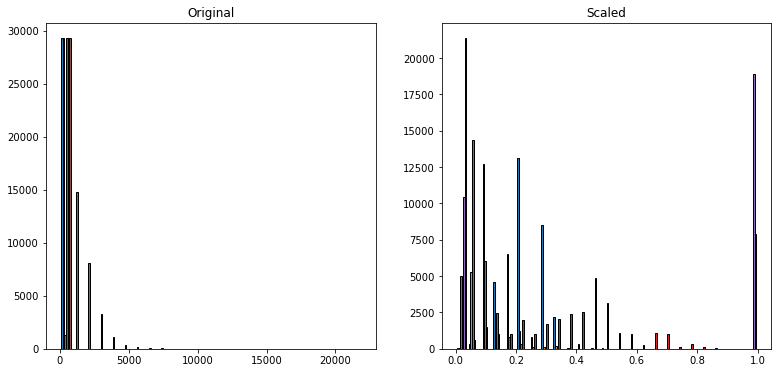

In [86]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled3, bins=25, ec='black')
plt.title('Scaled')

In [87]:
# this looks a lot better. Sigh. 
scaler = MinMaxScaler()
train[['baths_scaled', 'beds_scaled', 'area_scaled', 'age_scaled']] = scaler.fit_transform(train[['baths', 'beds', 'area', 'age']])

In [88]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

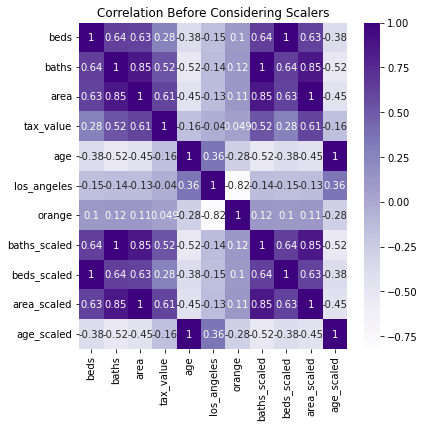

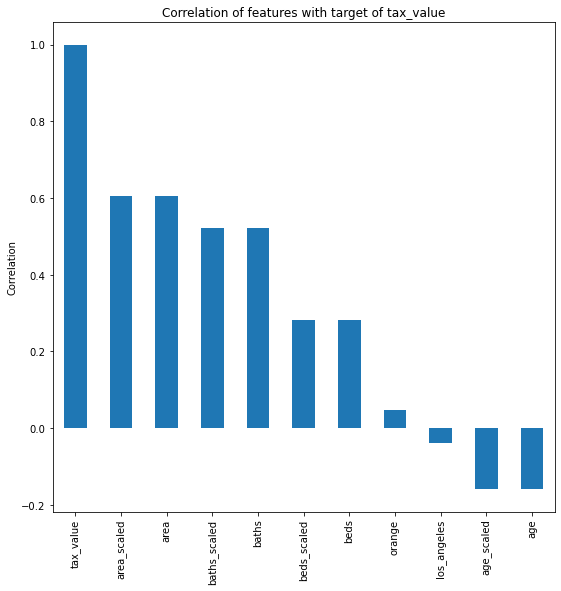

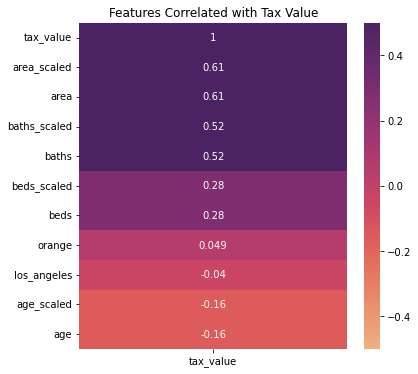

In [89]:
tax_correlations(train)

In [90]:
def tax_correlations_redux(train):
    '''
    easier to distinguish
    '''
    # establish figure size
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value Unscaled')
    # display the plot
    plt.show()

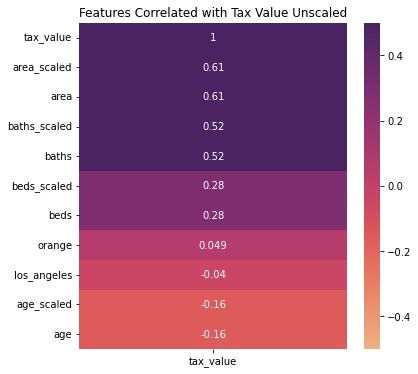

In [91]:
tax_correlations_redux(train)

In [ ]:
# The emore I do this. The less I understand scaling. 
# The thing about seeing area closely correlate with the assessed value definitely does make sense.
# Because the larger a house is, typically, the more expensive it would be.
# This can vary state to state, of course, and it does--but since we are only looking at California, that doesn't really help any. 
# that said, as far as exploration goes, I feel most confident following my gut, removing outliers, scaling min max and then rolling with modeling.
# I'll adjust scales once I get to that point, but in the interest of time, I need to start asking statistical questions. 